<a href="https://colab.research.google.com/github/ruantos/python-para-data/blob/main/emissoes_gases_estados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparando o ambiente

In [48]:
import pandas as pd

In [49]:
PATH = "/content/drive/MyDrive/Dados/efeito_estufa.parquet"

data = pd.read_parquet(PATH)

## Conhecendo os dados

In [50]:
data.shape

(103312, 63)

In [51]:
data.columns

Index(['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5',
       'Nível 6', 'Emissão / Remoção / Bunker', 'Gás', 'Estado',
       'Atividade Econômica', 'Produto', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021'],
      dtype='object')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Nível 1 - Setor             103312 non-null  object 
 1   Nível 2                     103312 non-null  object 
 2   Nível 3                     103253 non-null  object 
 3   Nível 4                     90920 non-null   object 
 4   Nível 5                     100788 non-null  object 
 5   Nível 6                     97691 non-null   object 
 6   Emissão / Remoção / Bunker  103312 non-null  object 
 7   Gás                         103312 non-null  object 
 8   Estado                      97374 non-null   object 
 9   Atividade Econômica         102076 non-null  object 
 10  Produto                     37413 non-null   object 
 11  1970                        103312 non-null  float64
 12  1971                        103312 non-null  float64
 13  1972          

## Conhecendo e Filtrando eventos não-importantes

In [53]:
data["Emissão / Remoção / Bunker"].unique()

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

In [54]:
remocao = data[
    data["Emissão / Remoção / Bunker"].isin(["Remoção NCI", "Remoção"]) ]

remocao.sample(5)

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
102118,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Mata Atlântica,em Área Protegida,Regeneração,Área sem vegetação -- Floresta secundária,Remoção,CO2e (t) GTP-AR2,BA,AGROPEC,...,-16.0,-50.0,-26.0,-96.0,-14.0,-18.0,-5.0,-14.0,-26.0,-1.0
100036,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Caatinga,fora de Área Protegida,Regeneração,Área sem vegetação -- Floresta secundária,Remoção,CO2 (t),RN,AGROPEC,...,-322.0,-130.0,-141.0,-158.0,-108.0,-330.0,-164.0,-23.0,-22.0,-13.0
99900,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Amazônia,em Área Protegida,Vegetação nativa estável,Floresta secundária -- Floresta secundária,Remoção,CO2e (t) GTP-AR5,RO,AGROPEC,...,-938257.0,-977872.0,-1035353.0,-1122075.0,-1221240.0,-1287884.0,-1343543.0,-1382763.0,-1408761.0,-1393579.0
100745,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Cerrado,fora de Área Protegida,Regeneração,Área sem vegetação -- Floresta secundária,Remoção,CO2e (t) GWP-AR6,PI,AGROPEC,...,-484.0,-482.0,-374.0,-398.0,-369.0,-574.0,-443.0,-404.0,-226.0,-461.0
98234,Mudança de Uso da Terra e Floresta,Remoção por Mudança de Uso da Terra,Cerrado,em Área Protegida,Outras Mudanças de uso da terra,Área sem vegetação -- Uso agropecuário,Remoção,CO2 (t),MS,AGROPEC,...,-357.0,-412.0,-430.0,-475.0,-550.0,-596.0,-413.0,-496.0,-281.0,-475.0


In [55]:
bunkers = data[data["Emissão / Remoção / Bunker"] == "Bunker"]
bunkers.sample(5)

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
67368,Energia,Emissões pela Queima de Combustíveis,Transportes,Aéreo,Querosene de aviação,Aeronaves de aviação civil,Bunker,NOx (t),None,TRAN_PASS,...,1.970324e+03,2.071246e+03,2.200588e+03,2.119154e+03,2.010037e+03,1.965306e+03,2.227631e+03,2.157679e+03,9.084916e+02,9.695392e+02
68919,Energia,Emissões pela Queima de Combustíveis,Transportes,Hidroviário,Óleo combustível,Embarcações,Bunker,CO2e (t) GWP-AR2,None,TRAN_CARGA,...,1.102323e+07,9.199842e+06,9.787320e+06,1.089297e+07,1.010182e+07,1.039896e+07,8.061484e+06,9.336037e+06,1.034943e+07,8.411685e+06
68910,Energia,Emissões pela Queima de Combustíveis,Transportes,Hidroviário,Óleo combustível,Embarcações,Bunker,CO (t),None,TRAN_CARGA,...,2.594796e+04,2.165583e+04,2.303871e+04,2.564133e+04,2.377903e+04,2.447847e+04,1.897621e+04,2.197642e+04,2.436189e+04,1.980056e+04
68913,Energia,Emissões pela Queima de Combustíveis,Transportes,Hidroviário,Óleo combustível,Embarcações,Bunker,N2O (t),None,TRAN_CARGA,...,2.820430e+02,2.353894e+02,2.504208e+02,2.787101e+02,2.584677e+02,2.660703e+02,2.062631e+02,2.388741e+02,2.648032e+02,2.152234e+02
68515,Energia,Emissões pela Queima de Combustíveis,Transportes,Hidroviário,Diesel de petróleo,Embarcações,Bunker,CO2e (t) GWP-AR5,None,TRAN_CARGA,...,1.249686e+06,1.769549e+06,1.449936e+06,1.824024e+06,9.454718e+05,4.935958e+05,1.285027e+06,1.475413e+06,1.686406e+06,1.470518e+06


## Filtragem deixando apenas eventos interessantes

In [56]:
emissoes = data[data["Emissão / Remoção / Bunker"] == "Emissão"]

In [57]:
emissoes["Emissão / Remoção / Bunker"].unique()

array(['Emissão'], dtype=object)

## Listando as atividades econômicas no dataframe

In [58]:
emissoes["Nível 1 - Setor"].unique()

array(['Processos Industriais', 'Agropecuária', 'Energia', 'Resíduos ',
       'Mudança de Uso da Terra e Floresta'], dtype=object)

## Todos os estados estão no dataframe?

In [59]:
emissoes["Estado"].unique()

array(['SP', 'BA', 'RJ', 'MG', 'SE', 'PR', None, 'RO', 'AM', 'PA', 'TO',
       'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'MT', 'MS', 'GO', 'DF',
       'ES', 'SC', 'RS', 'AC', 'AP', 'RR'], dtype=object)

In [60]:
# O brasil possui 26 estados + o distrito federal, somando 27
emissoes["Estado"].nunique()

27

## Filtrando emissões apenas do sul

In [61]:
emissoes_sul = data[data["Estado"].isin(["PR", "SC", "RS"])]
emissoes_sul.sample(5)

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
4481,Agropecuária,Manejo de Dejetos Animais,Diretas,Outros,Animal,Caprino,Emissão,CO2e (t) GWP-AR2,SC,PEC,...,204.357510,180.338550,177.175530,174.440910,169.807050,111.344730,119.138040,135.106650,145.109790,141.057840
9584,Agropecuária,Solos Manejados,Diretas,Deposição de dejetos em pastagem,Animal,Bubalino,Emissão,CO2e (t) GWP-AR4,SC,PEC,...,5777.229918,4341.859728,4638.245174,4646.974619,4738.425949,4944.191441,4479.452410,4449.938572,4136.509923,4811.171325
45797,Energia,Emissões pela Queima de Combustíveis,Industrial,Mineração e pelotização,Diesel de petróleo,Centrais Elétricas Autoprodutoras,Emissão,CO2e (t) GTP-AR5,PR,ENE_ELET,...,87.388380,110.494541,1011.443474,871.126634,89.353148,72.990023,79.301515,50.717281,54.192546,51.042436
61203,Energia,Emissões pela Queima de Combustíveis,Industrial,Têxtil,Óleo combustível,Consumo Final Energético,Emissão,CO2e (t) GWP-AR6,RS,OUTRA_IND,...,18777.505835,18530.246114,17665.654576,15083.430438,13937.042764,12909.774795,9857.139256,8786.044138,2458.731044,2532.463229
80499,Resíduos,Resíduos Sólidos,Disposição Final de Resíduos Sólidos,Resíduos Sólidos Municipais,Disposição em Aterro Controlado ou Lixão,None,Emissão,CO2e (t) GTP-AR4,RS,SANEAMENTO,...,143160.570817,135112.127292,127651.862029,120808.588111,114082.107684,106624.330525,100369.758791,93316.396756,87582.263547,81597.290359


## Filtrando por atividade econômica e estado

In [62]:
emissoes_mudanca_am = emissoes[
    (emissoes["Nível 1 - Setor"] == 'Mudança de Uso da Terra e Floresta') &
    (emissoes["Estado"] == "AM")
    ]

emissoes_mudanca_am.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
81262,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2 (t),AM,AGROPEC,...,85118.0,97637.0,87619.0,121815.0,113759.0,52998.0,61170.0,48264.0,14381.0,31867.0
81271,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR2,AM,AGROPEC,...,85118.0,97637.0,87619.0,121815.0,113759.0,52998.0,61170.0,48264.0,14381.0,31867.0
81280,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR4,AM,AGROPEC,...,85118.0,97637.0,87619.0,121815.0,113759.0,52998.0,61170.0,48264.0,14381.0,31867.0
81289,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR5,AM,AGROPEC,...,85118.0,97637.0,87619.0,121815.0,113759.0,52998.0,61170.0,48264.0,14381.0,31867.0
81298,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR6,AM,AGROPEC,...,85118.0,97637.0,87619.0,121815.0,113759.0,52998.0,61170.0,48264.0,14381.0,31867.0


## Maior emissão do setor de agropecuária em 2021

In [90]:
emissoes_agro = emissoes.loc[(emissoes["Estado"] == "PA") &
    (emissoes['Nível 1 - Setor'] == "Agropecuária"), "2021"].max()

emissoes_agro
# emissoes_agro
# emissoes_agro[
#     (emissoes_agro[2021] == emissoes_agro[2021].max())
# ]

36856969.7986

## Transformando colunas em valores com melt
- Útil para diminuir números de colunas repetitivas
- Aumenta número de registros
- De larga para longa

In [64]:
keep_cols = list(emissoes.columns[:11])
melt_cols = list(emissoes.columns[11:])

- **frame** - df a ser pivotado
- **id_vars** - cols que serão mantidas e não modificadas
- **value_vars** - cols a serem pivotadas
- **var_name** - nome da nova coluna que receberá o título das pivotadas
- **value_name** - nome da nova coluna que receberá os valores das colunas pivotadas

In [65]:
emissoes_por_ano = pd.melt(frame=emissoes, id_vars=keep_cols,
                           value_vars=melt_cols, var_name="Year",
                           value_name="Taxa_emissao")

## Total de emissão por cada tipo de gás

In [66]:
emissoes_por_ano.columns

Index(['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5',
       'Nível 6', 'Emissão / Remoção / Bunker', 'Gás', 'Estado',
       'Atividade Econômica', 'Produto', 'Year', 'Taxa_emissao'],
      dtype='object')

In [67]:
emissao_por_gas = emissoes_por_ano.groupby(by="Gás")["Taxa_emissao"].sum().sort_values(ascending=False)

<Axes: ylabel='Gás'>

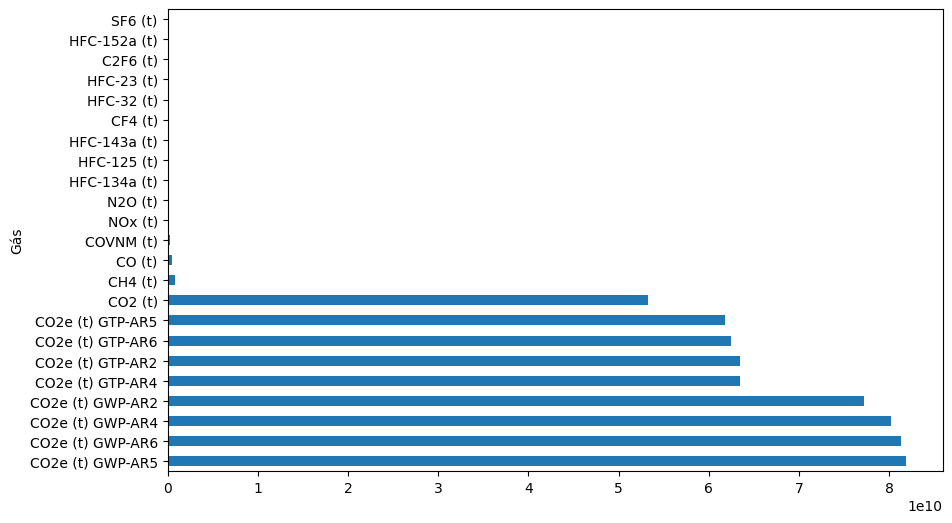

In [68]:
emissao_por_gas.plot(kind="barh", figsize=(10, 6))

### 1. Faça um agrupamento de dados com base na coluna "Nível 1 - Setor"

In [69]:
emissoes_por_ano.groupby(by="Nível 1 - Setor").groups

{'Agropecuária': [1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, ...], 'Energia': [23277, 23278, 23279, 23280, 23281, 23282, 23283, 23284, 23285, 23286, 23287, 23288, 23289, 23290, 23291, 23292, 23293, 23294, 23295, 23296, 23297, 23298, 23299, 23300, 23301, 23302, 23303, 23304, 23305, 23306, 23307, 23308, 23309, 23310, 23311, 23312, 23313, 23314, 23315, 23316, 23317, 23318, 23319, 23320, 23321, 23322, 23323, 23324, 23325, 23326, 23327, 23328, 

### 2. Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" e localize os dados do grupo "Agropecuária".

In [70]:
emissoes_por_ano.groupby(by="Nível 1 - Setor").get_group("Agropecuária")

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,Produto,Year,Taxa_emissao
1137,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),AC,AGR,ALIM_BEBIDAS,1970,0.000000
1138,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),AL,AGR,ALIM_BEBIDAS,1970,2050.445805
1139,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),AM,AGR,ALIM_BEBIDAS,1970,0.000000
1140,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),AP,AGR,ALIM_BEBIDAS,1970,0.000000
1141,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),BA,AGR,ALIM_BEBIDAS,1970,466.934705
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855420,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,Emissão,N2O (t),RS,AGR,ALIM_BEBIDAS,2021,929.545042
4855421,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,Emissão,N2O (t),SC,AGR,ALIM_BEBIDAS,2021,295.813919
4855422,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,Emissão,N2O (t),SE,AGR,ALIM_BEBIDAS,2021,32.734589
4855423,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,Emissão,N2O (t),SP,AGR,ALIM_BEBIDAS,2021,653.155812


### 3. Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para identificar a média de emissão de cada setor no ano de 2021.

In [71]:
emissoes_2021 = emissoes_por_ano[emissoes_por_ano["Year"] == 2021]
emissoes_2021.groupby(by="Nível 1 - Setor")["Taxa_emissao"].mean()

,Taxa_emissao
Nível 1 - Setor,


### 4. Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para identificar a soma de emissão de cada setor. Ordene os dados da maior para menor emissão.

In [72]:
emissoes_por_ano.groupby(by="Nível 1 - Setor")["Taxa_emissao"].sum().sort_values(ascending=False)

,Taxa_emissao
Nível 1 - Setor,
Mudança de Uso da Terra e Floresta,3.524898e+11
Energia,1.205314e+11
Agropecuária,1.147284e+11
Processos Industriais,2.849965e+10
Resíduos,1.034465e+10


## Quais as atividades econômicas mais poluentes para cada tipo de gás?

In [91]:
emissoes_por_ano.columns

Index(['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5',
       'Nível 6', 'Emissão / Remoção / Bunker', 'Gás', 'Estado',
       'Atividade Econômica', 'Produto', 'Year', 'Taxa_emissao'],
      dtype='object')

## Quais são os gases mais poluentes para cada atividade econômica?